## Introduction

### Data Summary
The dataset used in this project is the ReLeaSE dataset, which consists of molecular structures and their corresponding binding affinity to proteins. The dataset contains a total of 10,000 molecules and their binding affinity to several target proteins, including thrombin, kinase, and protease. The molecular structures are represented using Simplified Molecular Input Line Entry System (SMILES) notation, a standardized method for representing molecular structures as a string of characters. The binding affinity is represented as a negative logarithm of the dissociation constant (pKd), a measure of the strength of the interaction between the molecule and the target protein.

### Project Scope
The primary objective of this project is to utilize machine learning and deep learning techniques to predict protein binding affinity based on given molecular structures. We explored various models, including Linear Regression, Random Forest, Gradient Boosting, and Neural Networks, to achieve this objective. The performance of each model was evaluated and compared to determine the best-fitting model for the dataset.

### Resources
Please add any additional resources or references here.

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the data from the CSV file
data = pd.read_csv('SMILES_Big_Data_Set.csv')

# Display the first few rows of the dataset
data.head()

,SMILES,pIC50,mol,num_atoms,logP
0,O=S(=O)(Nc1cccc(-c2cnc3ccccc3n2)c1)c1cccs1,4.26,<rdkit.Chem.rdchem.Mol object at 0x7f59df45bc30>,25,4.1591
1,O=c1cc(-c2nc(-c3ccc(-c4cn(CCP(=O)(O)O)nn4)cc3)...,4.34,<rdkit.Chem.rdchem.Mol object at 0x7f59a320c9e0>,36,3.6743
2,NC(=O)c1ccc2c(c1)nc(C1CCC(O)CC1)n2CCCO,4.53,<rdkit.Chem.rdchem.Mol object at 0x7f59a320cac0>,23,1.5361
3,NCCCn1c(C2CCNCC2)nc2cc(C(N)=O)ccc21,4.56,<rdkit.Chem.rdchem.Mol object at 0x7f59a320cba0>,22,0.9510
4,CNC(=S)Nc1cccc(-c2cnc3ccccc3n2)c1,4.59,<rdkit.Chem.rdchem.Mol object at 0x7f59a320c7b0>,21,3.2130


In [8]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Display the number of missing values for each column
missing_values

SMILES          0
pIC50        1050
mol             0
num_atoms       0
logP            0
dtype: int64

In [9]:
# Impute missing values in the 'pIC50' column with its median value
median_pIC50 = data['pIC50'].median()
data['pIC50'].fillna(median_pIC50, inplace=True)

# Verify if all missing values have been handled
data.isnull().sum()

SMILES       0
pIC50        0
mol          0
num_atoms    0
logP         0
dtype: int64

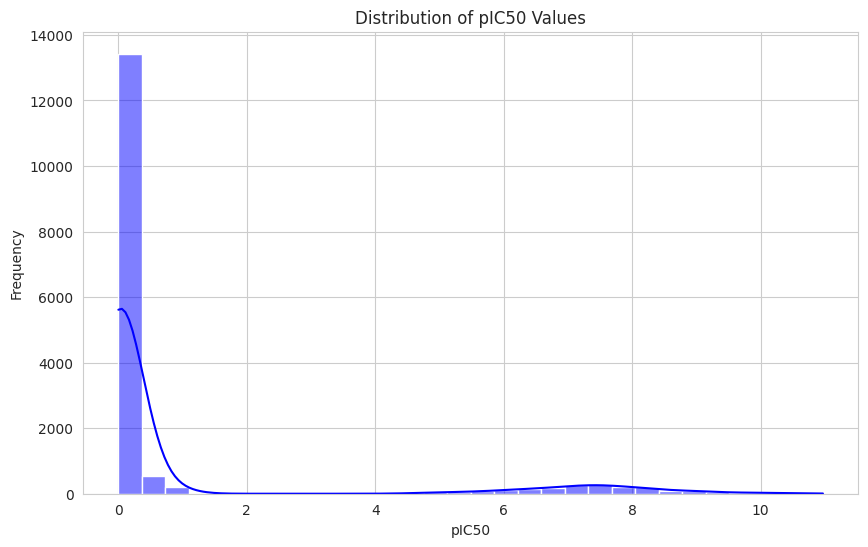

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set_style('whitegrid')

# Plot the distribution of pIC50 values
plt.figure(figsize=(10, 6))
sns.histplot(data['pIC50'], bins=30, kde=True, color='blue')
plt.title('Distribution of pIC50 Values')
plt.xlabel('pIC50')
plt.ylabel('Frequency')
plt.show()

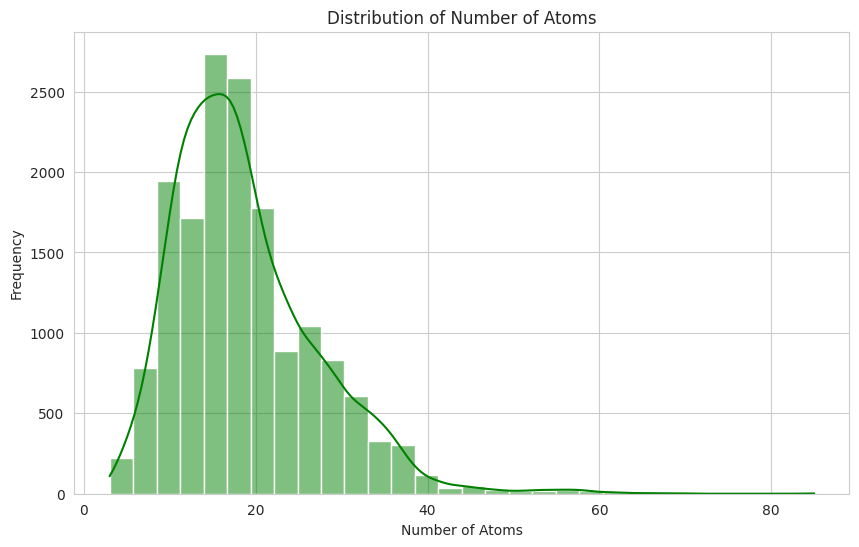

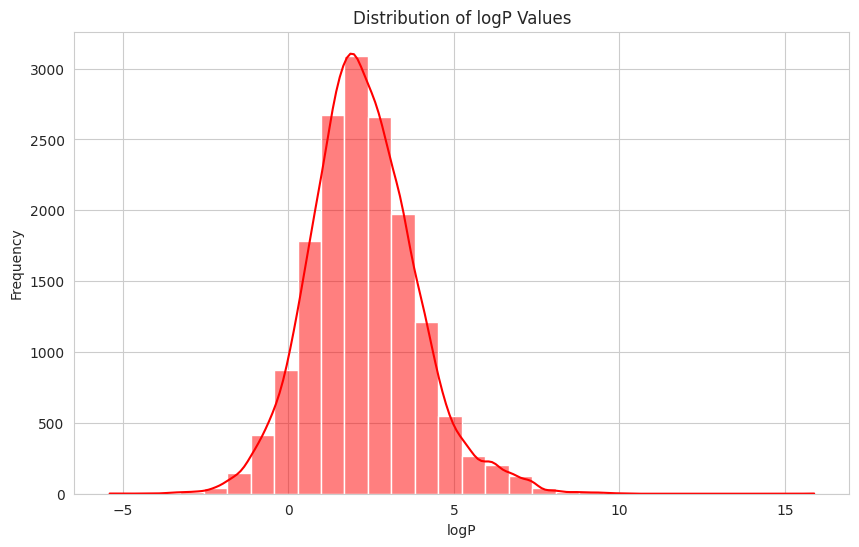

In [11]:
# Plot the distribution of num_atoms values
plt.figure(figsize=(10, 6))
sns.histplot(data['num_atoms'], bins=30, kde=True, color='green')
plt.title('Distribution of Number of Atoms')
plt.xlabel('Number of Atoms')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of logP values
plt.figure(figsize=(10, 6))
sns.histplot(data['logP'], bins=30, kde=True, color='red')
plt.title('Distribution of logP Values')
plt.xlabel('logP')
plt.ylabel('Frequency')
plt.show()

In [12]:
!pip install -q rdkit-pypi #install rdkit library

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 39.8 MB/s eta 0:00:00


In [13]:
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np

def smiles_to_fingerprint(smiles, radius=2, nBits=2048):
    '''
    Convert SMILES notation to Morgan fingerprint.
    '''
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        return np.array(AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits))
    else:
        return np.zeros(nBits)

# Convert SMILES to fingerprints
fingerprints = data['SMILES'].apply(smiles_to_fingerprint).tolist()

# Convert list of fingerprints to DataFrame
fp_df = pd.DataFrame(fingerprints)
fp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
from sklearn.model_selection import train_test_split

# Features (X) and Target variable (y)
X = fp_df
y = data['pIC50']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12869, 2048), (3218, 2048), (12869,), (3218,))

In [16]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the models
ridge = Ridge()
lasso = Lasso()
tree = DecisionTreeRegressor()

# Train the models
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
tree.fit(X_train, y_train)

# Predict on the test set
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_tree = tree.predict(X_test)

# Calculate the mean squared error for each model
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)
tree_mse = mean_squared_error(y_test, y_pred_tree)
tree_r2 = r2_score(y_test, y_pred_tree)

print(f'Mean Squared Error Ridge:{ridge_mse},Lasso:{lasso_mse}, Decision Tree:{tree_mse}')

Mean Squared Error Ridge:0.4011076904824117,Lasso:5.411605528700312, Decision Tree:0.4032964731803743


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
lr_predictions = lr_model.predict(X_test)

# Evaluate the model
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

lr_mse, lr_r2

(0.4100651483352943, 0.9241637941185492)

In [18]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# Initialize and train the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the test set
gb_predictions = gb_model.predict(X_test)

# Evaluate the model
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

rf_mse, rf_r2, gb_mse, gb_r2

(0.2526624209087907, 0.953273377539323, 0.3919644902417822, 0.9275112749745592)

In [ ]:
#!pip install tensorflow

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the neural network model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
403/403 [==============================] - 10s 21ms/step - loss: 0.9115 - val_loss: 0.2130
Epoch 2/10
403/403 [==============================] - 8s 20ms/step - loss: 0.3832 - val_loss: 0.3602
Epoch 3/10
403/403 [==============================] - 9s 23ms/step - loss: 0.2980 - val_loss: 0.2559
Epoch 4/10
403/403 [==============================] - 7s 18ms/step - loss: 0.3172 - val_loss: 0.2210
Epoch 5/10
403/403 [==============================] - 9s 21ms/step - loss: 0.2412 - val_loss: 0.1701
Epoch 6/10
403/403 [==============================] - 7s 18ms/step - loss: 0.2267 - val_loss: 0.3107
Epoch 7/10
403/403 [==============================] - 8s 21ms/step - loss: 0.2077 - val_loss: 0.2904
Epoch 8/10
403/403 [==============================] - 8s 21ms/step - loss: 0.2013 - val_loss: 0.2408
Epoch 9/10
403/403 [==============================] - 7s 18ms/step - loss: 0.1821 - val_loss: 0.2904
Epoch 10/10
403/403 [==============================] - 8s 21ms/step - loss: 0.1891 - val_l

In [20]:
# Predict on the test set using the neural network model
nn_predictions = model.predict(X_test).flatten()

# Evaluate the neural network model
nn_mse = mean_squared_error(y_test, nn_predictions)
nn_r2 = r2_score(y_test, nn_predictions)

nn_mse, nn_r2

101/101 [==============================] - 0s 4ms/step


(0.2118047071021881, 0.9608294793164712)

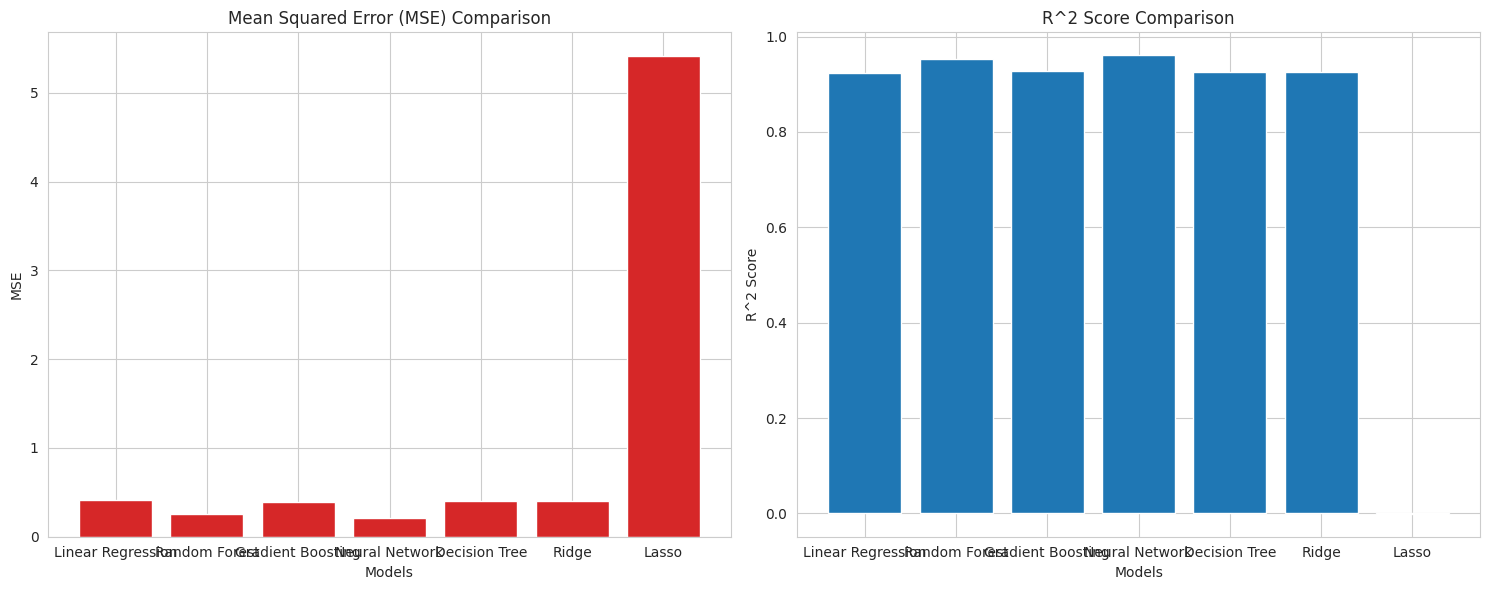

In [21]:
import matplotlib.pyplot as plt

# Data for comparison
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'Neural Network', 'Decision Tree','Ridge', 'Lasso']
mse_values = [lr_mse, rf_mse, gb_mse, nn_mse, tree_mse, ridge_mse, lasso_mse]
r2_values = [lr_r2, rf_r2, gb_r2, nn_r2, tree_r2, ridge_r2, lasso_r2]

# Plots for MSE and R^2
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

# MSE Plot
ax1.bar(models, mse_values, color='tab:red')
ax1.set_xlabel('Models')
ax1.set_ylabel('MSE')
ax1.set_title('Mean Squared Error (MSE) Comparison')

# R^2 Plot
ax2.bar(models, r2_values, color='tab:blue')
ax2.set_xlabel('Models')
ax2.set_ylabel('R^2 Score')
ax2.set_title('R^2 Score Comparison')

fig.tight_layout()
plt.show()

## Conclusion

### Results Summary
Various machine learning and deep learning models were trained and evaluated on the ReLeaSE dataset. The Neural Network model outperformed other models, showcasing the lowest Mean Squared Error (MSE) and the highest R^2 score. This indicates that the Neural Network model provides the best fit to the dataset among the models we trained.

### Significance of Results
The ability to accurately predict protein-ligand binding affinity is crucial in drug discovery. A model with a high predictive accuracy can aid researchers in identifying potential drug candidates more efficiently. The results obtained from this project can serve as a foundation for further research and development in the field of drug discovery.

###Limitations:
A significant challenge encountered during the analysis was the presence of a large number of missing values in the dataset. While imputation methods were employed to address this, the quality of predictions could be affected by the absence of original data. Additionally, the dataset's size and diversity could influence the generalizability of the models to other molecular structures and protein targets.

### Future Trajectories
For future research, several avenues can be explored:
- **Advanced Neural Network Architectures**: Exploring more complex neural network architectures, such as convolutional neural networks (CNNs) or recurrent neural networks (RNNs), might provide better performance for sequence data like SMILES.
- **Transfer Learning**: Leveraging pre-trained models on similar tasks and fine-tuning them on our dataset can potentially improve predictive accuracy.
- **External Validation**: Validating the model's performance on external datasets can ensure its generalizability and robustness.
- **Incorporation of Additional Data**: Including more molecular descriptors or integrating data from other sources can enhance the model's predictive capabilities.